**Contents**

* 1: Profiling data
* 2: Industrial sector normalisation

In [ ]:
%run -i notebook_preamble.ipy

In [3]:
import pandas_profiling
import seaborn as sns

In [4]:
df = pd.read_csv(f"{data_path}/raw/normalised_eu_indicators/eu_top_1000_2005_to_2017.csv").assign(company=lambda x: x.company.str.strip())

df.head()

,country,rnd_1_year_growth_%,capex_1_year_growth_%,capex_eur_million,capex_int_%,company,employees,employees_1_year_growth_%,eu_rank,industrial_sector,profitability_%,profits_1_year_growth_%,profits_losses_eur_million,rnd_eur_million,rnd_intensity_%,sales_1_year_growth_%,sales_eur_million,year
0,germany,1.56,4.89,4.53,NaN,daimlerchrysler,379.02,2.25,1,automobiles & parts (31),2.4,NaN,NaN,5658.00,3.98,4.12,142059.0,2004
1,germany,-8.13,4.56,3.98,NaN,siemens,419.20,-0.02,2,electronic & electrical (25),4.0,NaN,NaN,5063.00,6.74,1.26,75167.0,2004
2,germany,0.58,15.25,13.73,NaN,volkswagen,321.09,2.03,3,automobiles & parts (31),2.0,NaN,NaN,4164.00,4.68,0.62,88963.0,2004
3,uk,1.72,4.06,4.88,NaN,glaxosmithkline,99.84,-3.23,4,pharma & biotech (48),30.3,NaN,NaN,4010.09,13.94,-5.05,28757.0,2004
4,france,-2.63,NaN,NaN,NaN,sanofi-aventis,96.44,NaN,5,pharma & biotech (48),11.6,NaN,NaN,3961.00,15.58,4.62,25418.0,2004


# Profiling

In [5]:
pandas_profiling.ProfileReport(df)

Number of variables,18
Number of observations,12700
Total Missing (%),8.1%
Total size in memory,1.7 MiB
Average record size in memory,144.0 B
Numeric,12
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,2


**Profiling observations:**
    
* 390 companies with no `employees`
* some companies have fractional `employees`
* very large negative `profitability_%` values
* very large `profit_1y_growth_%` values
* `rnd_growth_%` is left censored (big decreases -> not top 1000 anymore)
* only 700 companies in 2004
* `capex_int_%` starts 2010
* `profits_1_year_growth_%` and `profits_losses_eur_million` starts 2011
* `industrial_sector` naming changes twice over time
    - 2004: ICB (original version) 
    - 2005-2010: ICB (mix of 3rd and 4th level?) 
    - 2011-2016: ICB - https://en.wikipedia.org/wiki/Industry_Classification_Benchmark

In [6]:
# Missing variables by year
dfg = df.groupby('year')
display(dfg
        .apply(lambda x: x.isnull().sum(0))
        .T
       )

display(dfg.size())

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,0,0,0,0,0,0,0,0,0,0,0,0,0
rnd_1_year_growth_%,14,49,24,17,17,11,6,7,7,6,19,18,7
capex_1_year_growth_%,83,93,36,154,31,30,24,386,332,347,394,386,120
capex_eur_million,69,72,17,142,27,25,14,385,328,340,345,0,103
capex_int_%,700,1000,1000,1000,1000,1000,14,391,13,13,18,189,117
company,0,0,0,0,0,0,0,0,0,0,0,0,0
employees,12,0,0,0,0,0,0,0,47,0,0,0,17
employees_1_year_growth_%,19,27,16,18,16,16,14,61,51,47,37,231,43
eu_rank,0,0,0,0,0,0,0,0,0,0,0,0,0
industrial_sector,0,0,0,0,0,0,0,0,0,0,0,0,0


year
2004     700
2005    1000
2006    1000
2007    1000
2008    1000
2009    1000
2010    1000
2011    1000
2012    1000
2013    1000
2014    1000
2015    1000
2016    1000
dtype: int64

year
2004    32
2005    44
2006    44
2007    45
2008    45
2009    45
2010    45
2011    38
2012    39
2013    39
2014    40
2015    36
2016    39
Name: industrial_sector, dtype: int64

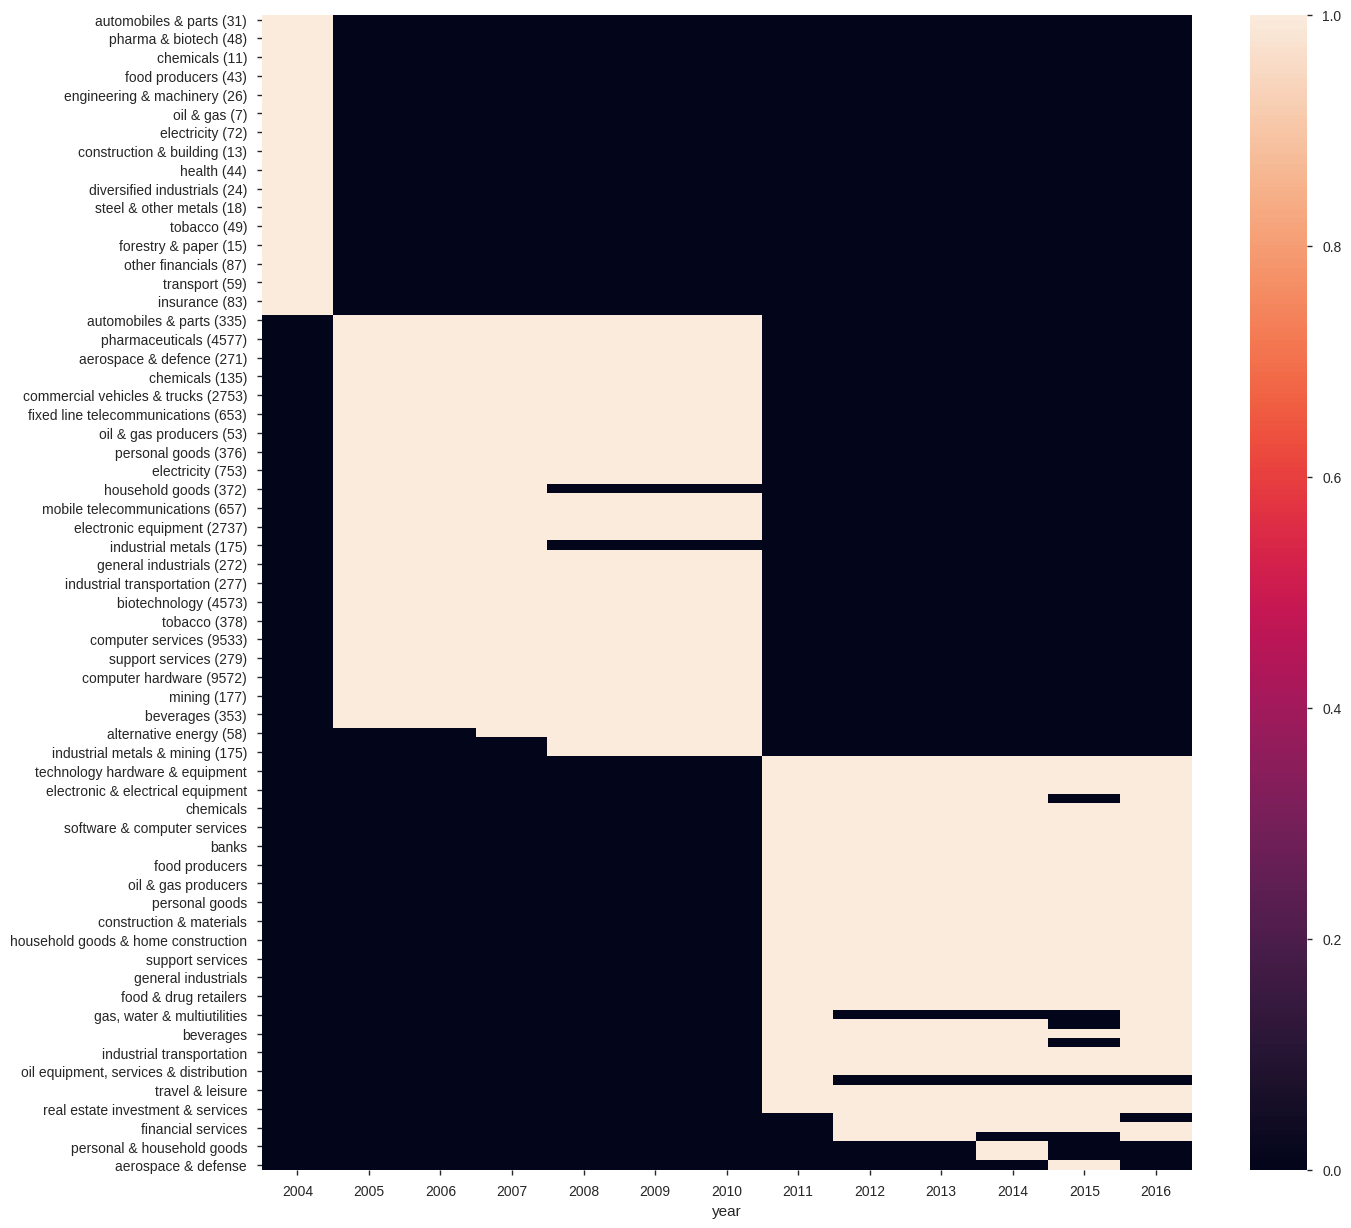

In [7]:
# Number of unique `industrial_sector` sectors by year
display(dfg.industrial_sector.nunique())

# Change in sector naming
fig, ax = plt.subplots(figsize=(15, 15))
display(dfg
        .industrial_sector
        .unique()
        .apply(lambda x: pd.Series(1, x))
        .fillna(0)
        .T
        .pipe(sns.heatmap, ax=ax)
       )

In [8]:
df.head()

,country,rnd_1_year_growth_%,capex_1_year_growth_%,capex_eur_million,capex_int_%,company,employees,employees_1_year_growth_%,eu_rank,industrial_sector,profitability_%,profits_1_year_growth_%,profits_losses_eur_million,rnd_eur_million,rnd_intensity_%,sales_1_year_growth_%,sales_eur_million,year
0,germany,1.56,4.89,4.53,NaN,daimlerchrysler,379.02,2.25,1,automobiles & parts (31),2.4,NaN,NaN,5658.00,3.98,4.12,142059.0,2004
1,germany,-8.13,4.56,3.98,NaN,siemens,419.20,-0.02,2,electronic & electrical (25),4.0,NaN,NaN,5063.00,6.74,1.26,75167.0,2004
2,germany,0.58,15.25,13.73,NaN,volkswagen,321.09,2.03,3,automobiles & parts (31),2.0,NaN,NaN,4164.00,4.68,0.62,88963.0,2004
3,uk,1.72,4.06,4.88,NaN,glaxosmithkline,99.84,-3.23,4,pharma & biotech (48),30.3,NaN,NaN,4010.09,13.94,-5.05,28757.0,2004
4,france,-2.63,NaN,NaN,NaN,sanofi-aventis,96.44,NaN,5,pharma & biotech (48),11.6,NaN,NaN,3961.00,15.58,4.62,25418.0,2004


# Industrial sector normalisation

Outline (in order of trying):
    
* Match on company name and define sector as most recent after 2011
* Using matches obtained above, count number of transitions from old
    sector to new sector and define the most prevalent as the redefinition.
    
    E.g. if old sector "aerospace & defence (271)" maps to new sector 
    "aerospace & defence" ten times and "electronic & electrical equipment" once then
    map between "aerospace & defence (271)" and "aerospace & defence".
* string similarity matching of sector names (above threshold 0.6)
* manual redefinition

Sector re-classification strategy:
    
* Repeat companies assume their newest classification
* Otherwise classify into most common remapping
* Otherwise classify into most similar string

In [393]:
# Old ICB codes
old_set = df.query("2004 < year < 2011").industrial_sector.unique()
# New ICB codes
new_set = df.query("year > 2010").industrial_sector.unique()

def isin(x, col, my_set):
    """
    Return entries where values in column `col`
    are contained within `my_set`
    """
    return (x.loc[x[col].isin(my_set)])

# Get different sectors duplicate companies listed under
# and put into a
icb_mappings = (df
 .query("year > 2004")
 .groupby('company')
 .industrial_sector.unique()
 .to_frame()
 .assign(n_sector=lambda x: x.industrial_sector.apply(len))
 .query("n_sector == 2")  # Keep entries which have one change only
 .industrial_sector
 .apply(pd.Series)
 .rename(columns={0: 'old', 1: 'new'})
 # Keep only changes between old and new classifications
 # (Not due to mergers/re-classification)
 .pipe(isin, "old", old_set)
 .pipe(isin, "new", new_set)
)

icb_mappings.head()

,old,new
company,,
3w power,alternative energy (58),alternative energy
4sc,biotechnology (4573),pharmaceuticals & biotechnology
a-tec industries,industrial machinery (2757),industrial engineering
aareal bank,banks (835),banks
ab science,biotechnology (4573),pharmaceuticals & biotechnology


In [11]:
icb_mappings

,old,new
company,,
3w power,alternative energy (58),alternative energy
4sc,biotechnology (4573),pharmaceuticals & biotechnology
a-tec industries,industrial machinery (2757),industrial engineering
aareal bank,banks (835),banks
ab science,biotechnology (4573),pharmaceuticals & biotechnology
abengoa,general industrials (272),general industrials
ablynx,biotechnology (4573),pharmaceuticals & biotechnology
accenture,support services (279),support services
acciona,construction & materials (235),construction & materials


old
aerospace & defence (271)                                         aerospace & defence
chemicals (135)                                                             chemicals
computer hardware (9572)                              technology hardware & equipment
computer services (9533)                                 software & computer services
industrial machinery (2757)                                    industrial engineering
internet (9535)                                          software & computer services
oil equipment, services & distribution (57)    oil equipment, services & distribution
other financials (877)                                             financial services
software (9537)                                          software & computer services
support services (279)                                               support services
dtype: object


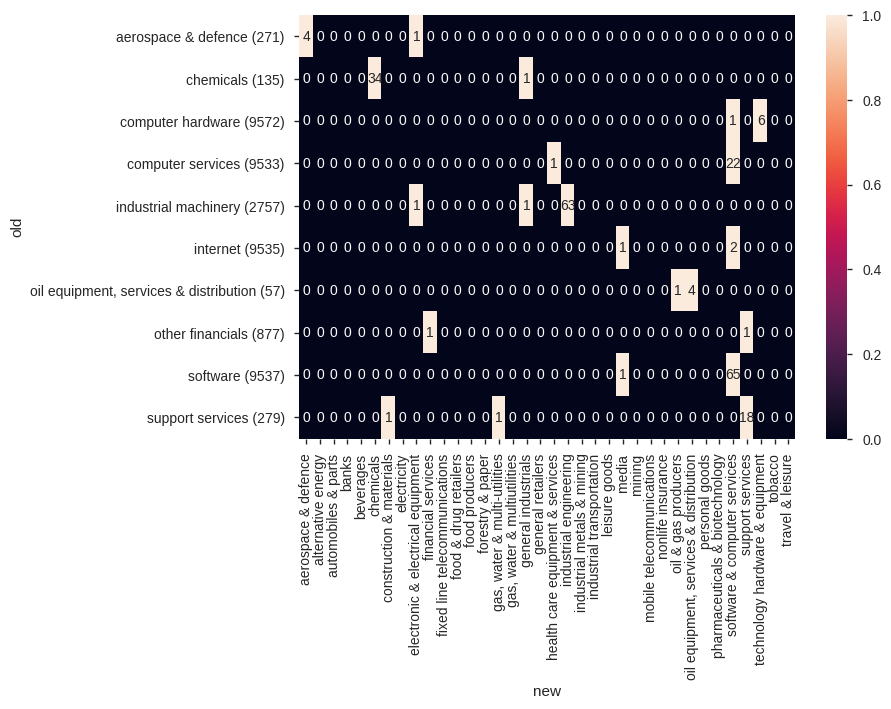

In [12]:
# Ambiguous mappings (one old maps into multiple new)
# E.g. "aerospace & defence (271)" maps to both "aerospace & defence" and "electronic & electrical equipment"
X = icb_mappings.pivot_table(index='new', columns='old', aggfunc=len, fill_value=0)

icb_remap = (X.loc[X.apply(lambda x: x.nonzero()[0].size > 0, 1),
                   X.apply(lambda x: x.nonzero()[0].size > 1, 0)]
            )

icb_remap.T.pipe(sns.heatmap, vmin=0, vmax=1, annot=True, xticklabels=True)

icb_remap = icb_remap.idxmax()
print(icb_remap)

## Start matching

In [352]:
from fuzzywuzzy import process

In [394]:
## Companies latest sector code


def newest_sector(x):
    """
    Return the latest `industrial_sector` code if
    last year is after 2010 (latest change); else return nan
    """
    if x.year.max() > 2010:
        return (x.sort_values('year')
                 .iloc[-1]
                 .industrial_sector
               )
    else:
        return np.nan

In [516]:
def sector_remap(leftovers, mapper, column='industrial_sector'):
    """
    Remap rows of `leftovers` with no `new_sector` entry applying map `mapper`
    to the column `column`
    """
    leftovers =  (df.loc[leftovers.query("new_sector.isnull()", engine='python').index]
                  .query("year > 2004")
                  .assign(new_sector=lambda x: x[column].map(mapper))
                  .loc[:, ('industrial_sector', 'new_sector')]
                 )

    logging.info(f"Matched {leftovers.dropna().shape[0]}/{leftovers.shape[0]} items")
    return leftovers.dropna(), leftovers.loc[(leftovers
                                              .index
                                              .difference(leftovers.dropna().index))
                                            ]

In [491]:
# Fuzzy match old and new sector names and accept best match above threshold score of 60

fuzz_remap = (df#.loc[leftovers.index]
              .query("year > 2004")
              .industrial_sector
              .apply(lambda x: pd.Series([x, *process.extractOne(x, choices=new_set)]), 1)
              .rename(columns={0: 'old_sector', 1: 'new_sector', 2: 'thresh'})
              .drop_duplicates()
#               .query("thresh > 60")
              .drop('thresh', 1)
              .set_index('old_sector')
              .squeeze()
              )


# "household goods (372)" -> "leisure goods"
# should be  "household goods & home construction"?

In [519]:
# Mapped by company
company_remap = (df.groupby('company')
                   .apply(newest_sector)
                   .dropna())

remap_company, leftovers = sector_remap(df.assign(new_sector=np.nan), company_remap, column='company')

# Try mapping by frequency
remap_common, leftovers = sector_remap(leftovers, icb_remap)

# Try mapping fuzzy matching
remap_fuzz, leftovers = sector_remap(leftovers, fuzz_remap)

In [521]:
L = logging.getLogger()
L.setLevel(logging.INFO)

In [523]:
L.handlers.append(logging.handlers.)

In [526]:
logging.handlers.

<module 'logging.handlers' from '/home/alex/anaconda3/envs/GIS/lib/python3.6/logging/handlers.py'>

In [475]:
# Manual remainders
manual_remap = pd.Series({
    'semiconductors (9576)': 'technology hardware & equipment',
    'commercial vehicles & trucks (2753)': 'industrial transportation',
})

remap_manual, leftovers = sector_remap(leftovers, manual_remap)

# Pull all matches together
df_norm = (pd.concat([remap_company, remap_common, remap_fuzz, remap_manual])
           .sort_index()
           .join(df, how='right', lsuffix='_L')
           .query("year > 2004")
           .assign(industrial_sector=lambda x: x.new_sector)
           .drop(['new_sector', 'industrial_sector_L'], 1)
)

df_norm.head()

df_norm.to_csv(f"{data_path}/interrim/normalised_scoreboard.csv")

,country,rnd_1_year_growth_%,capex_1_year_growth_%,capex_eur_million,capex_int_%,company,employees,employees_1_year_growth_%,eu_rank,industrial_sector,profitability_%,profits_1_year_growth_%,profits_losses_eur_million,rnd_eur_million,rnd_intensity_%,sales_1_year_growth_%,sales_eur_million,year
700,germany,-0.16,4.53,4.42,NaN,daimlerchrysler,386.47,1.96,1,automobiles & parts,1.94,NaN,NaN,5649.00,3.77,5.43,149776.0,2005
701,germany,1.82,3.98,7.02,NaN,siemens,439.40,4.82,2,electronic & electrical equipment,4.15,NaN,NaN,5155.00,6.83,0.37,75445.0,2005
702,uk,10.46,4.88,4.62,NaN,glaxosmithkline,99.50,-0.33,3,pharmaceuticals & biotechnology,31.98,NaN,NaN,4564.13,14.48,6.39,31524.0,2005
703,germany,-2.14,13.73,12.99,NaN,volkswagen,323.83,0.85,4,automobiles & parts,2.91,NaN,NaN,4075.00,4.28,7.09,95268.0,2005
704,france,2.10,0.00,0.00,NaN,sanofi-aventis,97.18,0.77,5,pharmaceuticals & biotechnology,11.76,NaN,NaN,4044.00,14.81,7.45,27311.0,2005


## Checks

In [ ]:
# See how accurate fuzzy matching would be alone...
fuzz_all, leftovers = sector_remap(df.assign(new_sector=np.nan), fuzz_remap)

def head_shape(x):
    display(x.head())
    print(f"Shape: {x.shape}")
    return x

(fuzz_all.join(pd.concat([remap_company, remap_common, remap_fuzz, remap_manual]), lsuffix='_L')
 .query("new_sector_L != new_sector")
 .drop_duplicates()
 .drop('industrial_sector_L', 1)
 .dropna()
 .sort_values('industrial_sector')
 .pipe(head_shape)
)

# discrepancies likely due to company mergers/mission drift? -> omit
(fuzz_all.join(pd.concat([remap_common, remap_fuzz, remap_manual]), lsuffix='_L')
 .query("new_sector_L != new_sector")
 .drop_duplicates()
 .drop('industrial_sector_L', 1)
 .dropna()
 .sort_values('industrial_sector')
 .pipe(head_shape)
)

# ... seems so

In [509]:
assert leftovers.new_sector.isnull().sum() == 0, "Not all sectors matched"

In [510]:
remap_company.describe()

,industrial_sector,new_sector
count,9997,9997
unique,91,42
top,pharmaceuticals & biotechnology,pharmaceuticals & biotechnology
freq,730,1224


In [511]:
remap_common.describe()

,industrial_sector,new_sector
count,697,697
unique,10,8
top,software (9537),software & computer services
freq,202,288


In [512]:
remap_fuzz.describe()

,industrial_sector,new_sector
count,1225,1225
unique,34,28
top,biotechnology (4573),pharmaceuticals & biotechnology
freq,142,267


In [513]:
remap_manual.describe()

,industrial_sector,new_sector
count,81,81
unique,2,2
top,semiconductors (9576),technology hardware & equipment
freq,53,53


In [514]:
leftovers.query("new_sector.isnull()", engine='python').describe()

,industrial_sector,new_sector
count,0,0
unique,0,0


# EDA

# Model